In [94]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [95]:
import pandas as pd
import plotly.express as px

In [96]:
# Get fips codes
fips = pd.read_csv("csv/ca_fips.csv", dtype={"fips": str})
fips = fips.drop(columns="county")

# Non-Residential Sector

In [97]:
electricity_sectors = pd.read_csv("csv/ElectricityByCountyAll.csv")[['County','Sector','2018']]
mask = (electricity_sectors['Sector'] == 'Non-Residential')
electricity_non_residential = electricity_sectors[mask].reset_index()[['County','Sector','2018']]
electricity_non_residential = pd.concat([fips,electricity_non_residential], axis=1)

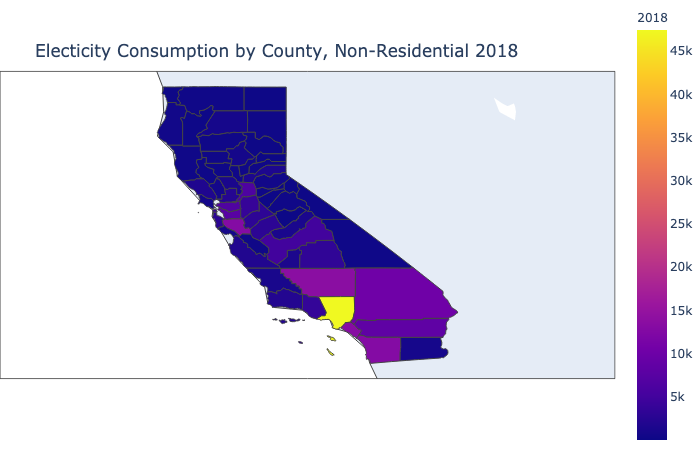

In [98]:
title = "Electicity Consumption by County, Non-Residential 2018"
fig = px.choropleth(
    electricity_non_residential,
    geojson=counties,
    locations='fips',
    color='2018',
    hover_name="County",
    title=title
)
fig.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0},
    hoverlabel=dict(
        bgcolor='#00bfff', 
        font_size=16, 
        font_family="Rockwell",
    ),
    title={'y':.9}
)
fig.update_geos(fitbounds="locations")
fig.show("png")

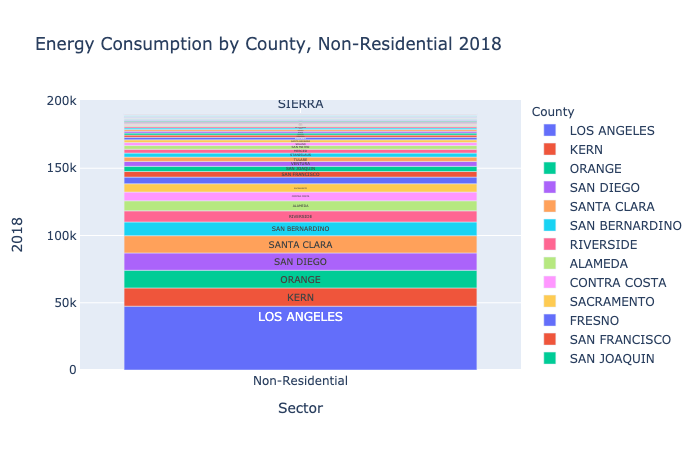

In [99]:
electricity_non_residential_sorted = electricity_non_residential.sort_values(by="2018", ascending=False)
fig_stacked_bar = px.bar(electricity_non_residential_sorted, x="Sector", y="2018", color="County", text="County", title="Energy Consumption by County, Non-Residential 2018")
fig_stacked_bar.show("png")

# Residential Sector
### By County

In [100]:
electricity_residential = pd.read_csv("csv/ElectricityByCounty.csv")[['County','Sector','2018']]
electricity_residential = pd.concat([fips,electricity_residential], axis=1)

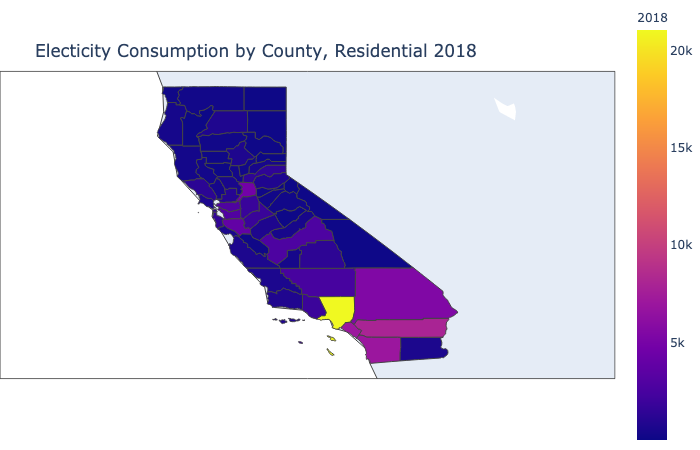

In [101]:
title = "Electicity Consumption by County, Residential 2018"
fig = px.choropleth(
    electricity_residential,
    geojson=counties,
    locations='fips',
    color='2018',
    hover_name="County",
    title=title
)
fig.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0},
    hoverlabel=dict(
        bgcolor='#00bfff', 
        font_size=16, 
        font_family="Rockwell",
    ),
    title={'y':.9}
)
fig.update_geos(fitbounds="locations")
fig.show("png")

### Per Person

In [102]:
population_residential = pd.read_csv("csv/ca_population_2016-2018.csv")[['County','Pop_2018']]
population_residential = pd.concat([fips,population_residential], axis=1)
population_residential['electricity_per_person_2018'] = electricity_residential['2018'] / population_residential['Pop_2018']

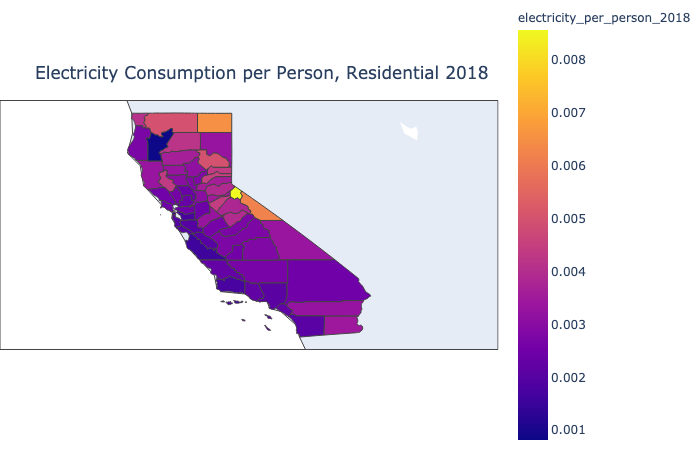

In [103]:
title = "Electricity Consumption per Person, Residential 2018"
fig_per_person = px.choropleth(
    population_residential,
    geojson=counties,
    locations='fips',
    color='electricity_per_person_2018',
    hover_name="County",
    title=title
)
fig_per_person.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0},
    hoverlabel=dict(
        bgcolor='#00bfff', 
        font_size=16, 
        font_family="Rockwell",
    ),
    title={'y':.85}
)
fig_per_person.update_geos(fitbounds="locations")
fig_per_person.show("png")

# Ten Highest Consumers of Energy, Residential

In [104]:
electricity_residential_sorted = electricity_residential.sort_values(by="2018", ascending=False)

In [105]:
top_10 = electricity_residential_sorted.iloc[:10,:]
remainder = electricity_residential_sorted.iloc[10:,:]

top_10_sum = top_10['2018'].sum()
remainder_sum = remainder['2018'].sum()

In [106]:
import numpy as np
data_top_10={'fips':[np.nan],'County':['Top Ten'],'2018':[top_10_sum]}
data_remainder={'fips':[np.nan],'County':['Remainder'],'2018':[remainder_sum]}
top_10_sum = pd.DataFrame(data=data_top_10)
remainder_sum = pd.DataFrame(data=data_remainder)

top_10_and_remainder_ = top_10.append(remainder_sum)
top_10_and_remainder_simple = top_10_sum.append(remainder_sum)

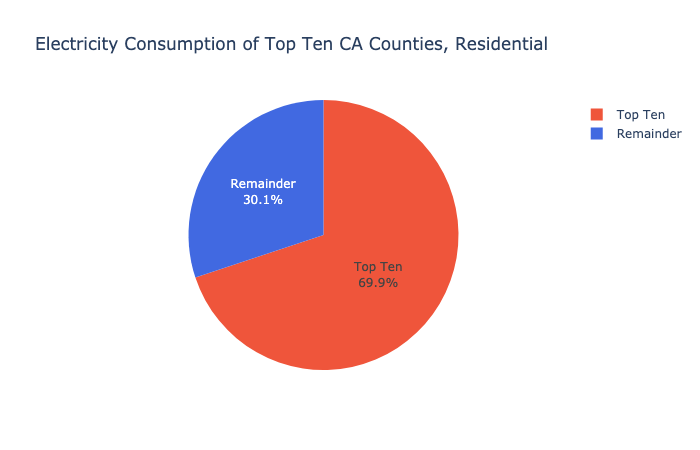

In [107]:
title = 'Electricity Consumption of Top Ten CA Counties, Residential'
fig_pie = px.pie(top_10_and_remainder_simple, values='2018', names='County', title=title, color='County', color_discrete_map={'Remainder':'royalblue'})
fig_pie.update_traces(textposition='inside', textinfo='percent+label')
fig_pie.show("png")

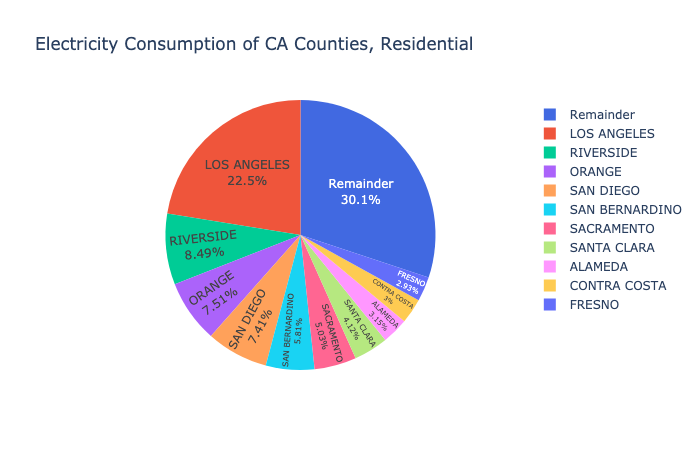

In [108]:
title = 'Electricity Consumption of CA Counties, Residential'
fig_pie = px.pie(top_10_and_remainder, values='2018', names='County', title=title, color='County', color_discrete_map={'Remainder':'royalblue'})
fig_pie.update_traces(textposition='inside', textinfo='percent+label')
fig_pie.show("png")

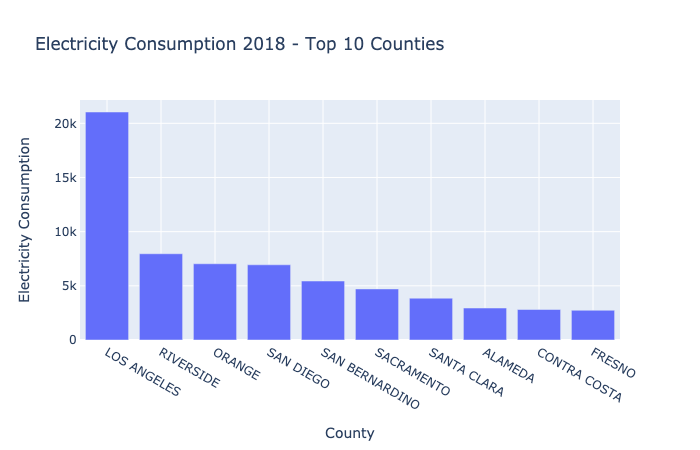

In [109]:
title = "Electricity Consumption 2018 - Top 10 Counties"
labels={"2018": "Electricity Consumption"}
fig_bar = px.bar(top_10, x='County', y='2018', title=title, labels=labels)
fig_bar.show("png")

# Different Perspectives on County Comparison

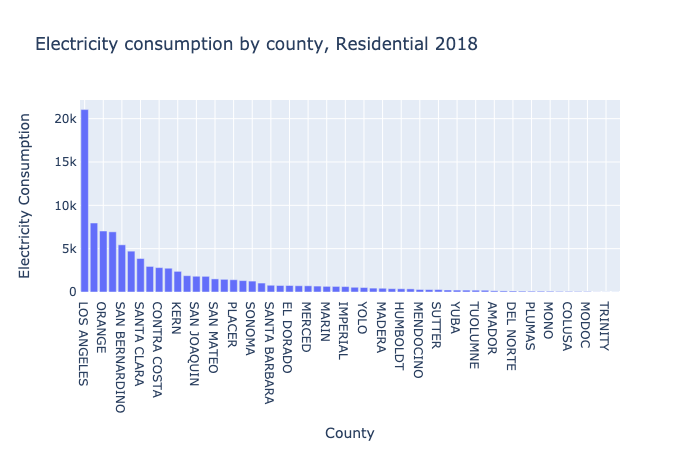

In [110]:
title = "Electricity consumption by county, Residential 2018"
labels={"2018": "Electricity Consumption"}
fig_bar_all = px.bar(electricity_residential_sorted, x='County', y='2018', title=title, labels=labels)
fig_bar_all.update_layout(hovermode="x unified")
fig_bar_all.show("png")

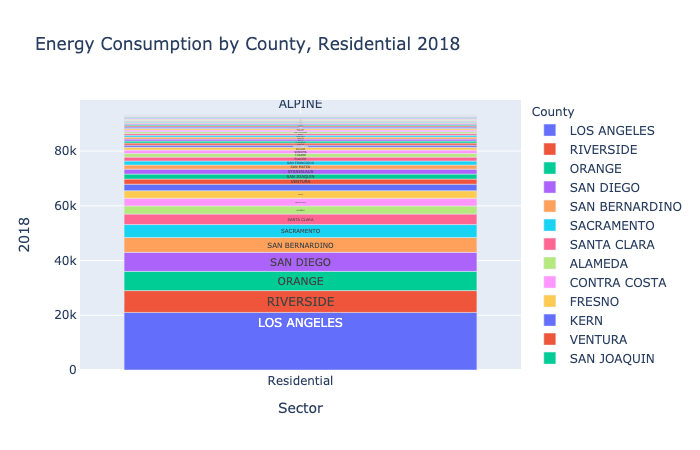

In [111]:
fig_stacked_bar = px.bar(electricity_residential_sorted, x="Sector", y="2018", color="County", text="County", title="Energy Consumption by County, Residential 2018")
fig_stacked_bar.show("png")

# Residential vs Non-Residential

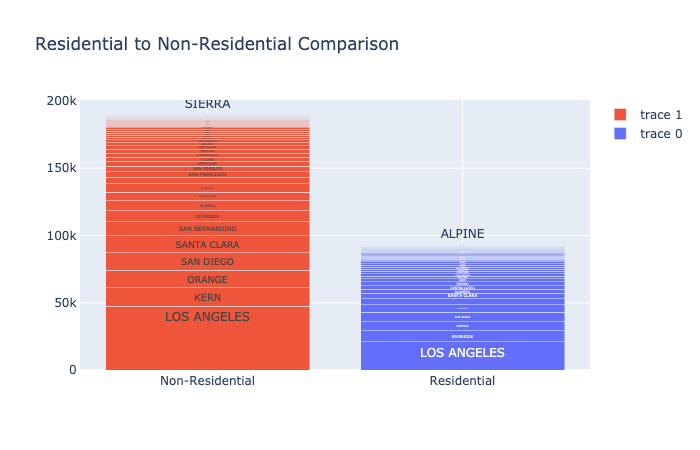

In [112]:
import plotly.graph_objects as go

title = "Residential to Non-Residential Comparison"
fig_stacked_bar_comparison = go.Figure(go.Bar(x=electricity_residential_sorted["Sector"],
    y=electricity_residential_sorted["2018"],
    text=electricity_residential_sorted["County"],
    textposition='auto'))

fig_stacked_bar_comparison.add_trace(go.Bar(x=electricity_non_residential_sorted["Sector"],
    y=electricity_non_residential_sorted["2018"],
    text=electricity_non_residential_sorted["County"],
    textposition='auto'))

fig_stacked_bar_comparison.update_layout(barmode='stack', xaxis={'categoryorder':'category ascending'}, title=title)

fig_stacked_bar_comparison.show("png")

In [103]:
import chart_studio.plotly as py
py.iplot(fig_stacked_bar, filename='Energy Consumption Stacked Bar', sharing='public')